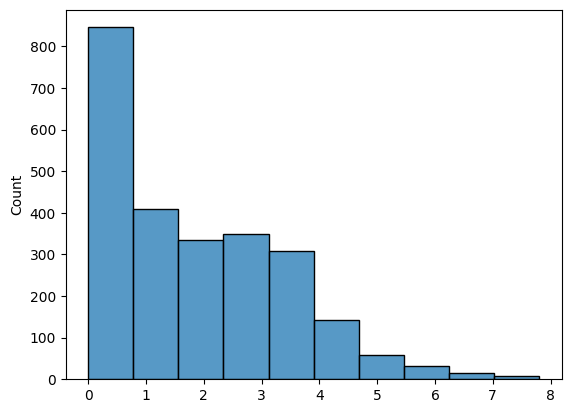

In [1]:
import numpy as np
from ipynb.fs.full.base import graph_objects

In [2]:
parameter_pairs = []
for a in np.linspace(0.5,10):
    for b in np.linspace(0.5,10):
        parameter_pairs.append((a,b))

In [8]:
#adjusting percentile
parameter_cs = []
for pair in parameter_pairs:
    sample_avg_cs = []
    for sample_sizes in np.array([200,500,1000,5000]):
        cs = []
        for seed in np.array([2,34,567,2021,0,99,101,5000,0,457]):
            rng = np.random.default_rng(seed=seed)
            sample = rng.beta(pair[0],pair[1],sample_sizes) 
            test_sample = sample[sample >= np.percentile(sample, 90)]
            c = (1-np.max(test_sample)) / np.std(test_sample,ddof=1)
            cs.append(c)
        sample_avg_cs.append(np.average(cs))
    parameter_cs.append(np.average(sample_avg_cs))

In [9]:
graph_objects(parameter_pairs,parameter_cs)

In [12]:
def beta_skew(a,b):
    return (2*(b-a)*np.sqrt(a+b+1))/((a+b+2)*np.sqrt(a*b))

In [14]:
#Dynamically adjusting percentile:
parameter_cs = []
for pair in parameter_pairs:
    sample_avg_cs = []
    for sample_sizes in np.array([200,500,1000,5000]):
        cs = []
        for seed in np.array([2,34,567,2021,0,99,101,5000,0,457]):
            rng = np.random.default_rng(seed=seed)
            sample = rng.beta(pair[0],pair[1], sample_sizes) 
            test_sample = sample[sample >= np.percentile(sample, 66.7+5*beta_skew(pair[0],pair[1]))]
            c = (1-np.max(test_sample)) / np.std(test_sample,ddof=1)
            cs.append(c)
        sample_avg_cs.append(np.average(cs))
    parameter_cs.append(np.average(sample_avg_cs))

In [15]:
graph_objects(parameter_pairs, parameter_cs)

In [10]:
#e^(-c):
parameter_cs = []
for pair in parameter_pairs:
    sample_avg_cs = []
    for sample_sizes in np.array([200,500,1000,5000,10000,50000]):
        cs = []
        for seed in np.array([2,34,567,2021,0,99,101,5000,0,457]):
            rng = np.random.default_rng(seed=seed)
            sample = rng.beta(pair[0],pair[1],sample_sizes) 
            test_sample = sample[sample >= np.percentile(sample, 75)]
            c = np.exp(-1*((1-np.max(test_sample))/np.std(test_sample,ddof=1)))
            cs.append(c)
        sample_avg_cs.append(np.average(cs))
    parameter_cs.append(np.average(sample_avg_cs))

In [11]:
graph_objects(parameter_pairs, parameter_cs)

In [12]:
#reciprocal
parameter_cs = []
for pair in parameter_pairs:
    sample_avg_cs = []
    for sample_sizes in np.array([200,500,1000,5000]):
        cs = []
        for seed in np.array([2,34,567,2021,0]):
            rng = np.random.default_rng(seed=seed)
            sample = rng.beta(pair[0],pair[1],sample_sizes) 
            test_sample = sample[sample >= np.percentile(sample, 66.7)]
            c = 1/(1-np.max(test_sample)) / np.std(test_sample,ddof=1)
            cs.append(c)
        sample_avg_cs.append(np.average(cs))
    parameter_cs.append(np.average(sample_avg_cs))

In [13]:
graph_objects(parameter_pairs, parameter_cs)

In [12]:
#test to see what functions work:
parameter_cs = []
for pair in parameter_pairs:
    sample_avg_cs = []
    for sample_sizes in np.array([200,500,1000,5000,10000,50000]):
        cs = []
        for seed in np.array([2,34,567,2021,0,99,101,5000,0,457]):
            rng = np.random.default_rng(seed=seed)
            sample = rng.beta(pair[0],pair[1],sample_sizes) 
            test_sample = sample[sample >= np.percentile(sample, 75)]
            c = ((1-np.max(test_sample)* (beta_skew(pair[0],pair[1])/1e3) ) / np.std(test_sample,ddof=1))
            cs.append(c)
        sample_avg_cs.append(np.average(cs)/(pair[0]+pair[1]))
    parameter_cs.append(np.average(sample_avg_cs))

In [13]:
graph_objects(parameter_pairs, parameter_cs)

e^(-c): too extreme

c/(a^n+b^n): too extreme

adjusting skew (both adding skew, multiplying skew and adding exponent to the power of skew): no effect

adjusting max using very small correcting factor + c/(a+b) (skew/1en, n>=3): So far the most effective in reducing range of c but still very flawed.